In [2]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

print(tf.__version__)
############ settings ############
data_dir = "C:/Users/hp/Desktop/densenet/plantvillage"

batch_size = 32
img_height = 128
img_width = 128

2.12.0


In [15]:
data_dir = "C:/Users/hp/Desktop/densenet/plantvillage"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2867 files belonging to 3 classes.
Using 2294 files for training.
Found 2867 files belonging to 3 classes.
Using 573 files for validation.


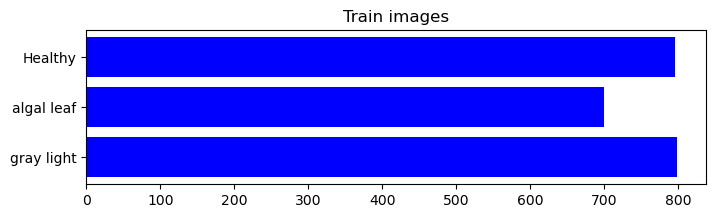

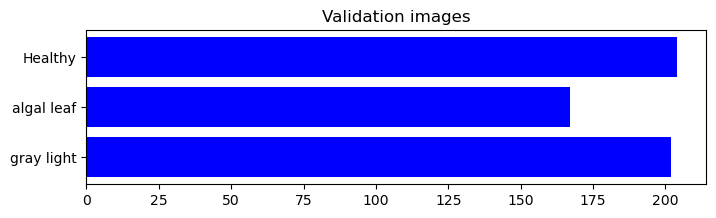

In [5]:
def plot_distribution(y, title):
    a = Counter(y)
    y = ['gray light','algal leaf','Healthy']
    
    x = [a[i] for i in range(3)]
    plt.figure(figsize=(8, 2))
    plt.barh(y, x, color='blue')
    plt.title(title)
    return plt.show()

y_train = np.concatenate([y for x, y in train_ds], axis=0)
y_val = np.concatenate([y for x, y in val_ds], axis=0)

plot_distribution(y_train, title="Train images")
plot_distribution(y_val, title = "Validation images")

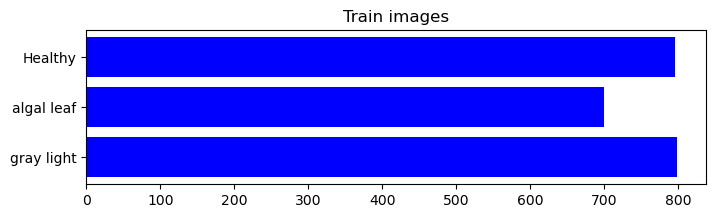

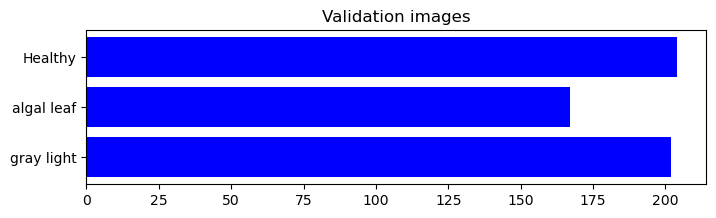

In [6]:
y_train = np.concatenate([y for x, y in train_ds], axis=0)
y_val = np.concatenate([y for x, y in val_ds], axis=0)

plot_distribution(y_train, title="Train images")
plot_distribution(y_val, title = "Validation images")

In [7]:
base_model = DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

In [8]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
num_classes = 3


In [10]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                      min_delta=0.0001,
                                                      patience=5)



In [12]:
pip install --upgrade tensorflow keras


^C
Note: you may need to restart the kernel to use updated packages.


In [18]:
num_classes = 3

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),

    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(num_classes, activation='softmax')

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                      min_delta=0.0001,
                                                      patience=5)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=22,
                    callbacks=[earlystop_callback])

Epoch 1/22
72/72 [==============================] - 48s 627ms/step - loss: 0.7136 - accuracy: 0.6822 - val_loss: 0.5088 - val_accuracy: 0.8150
Epoch 2/22
72/72 [==============================] - 43s 597ms/step - loss: 0.4861 - accuracy: 0.8156 - val_loss: 0.4045 - val_accuracy: 0.8412
Epoch 3/22
72/72 [==============================] - 44s 607ms/step - loss: 0.4139 - accuracy: 0.8378 - val_loss: 0.3474 - val_accuracy: 0.8551
Epoch 4/22
72/72 [==============================] - 46s 634ms/step - loss: 0.3617 - accuracy: 0.8588 - val_loss: 0.3266 - val_accuracy: 0.8639
Epoch 5/22
72/72 [==============================] - 46s 632ms/step - loss: 0.3096 - accuracy: 0.8771 - val_loss: 0.2913 - val_accuracy: 0.8831
Epoch 6/22
72/72 [==============================] - 47s 653ms/step - loss: 0.2853 - accuracy: 0.8867 - val_loss: 0.2992 - val_accuracy: 0.8831
Epoch 7/22
72/72 [==============================] - 47s 653ms/step - loss: 0.2659 - accuracy: 0.8984 - val_loss: 0.2742 - val_accuracy: 0.8831

In [19]:
loss, acc = model.evaluate(val_ds, batch_size=batch_size)
print("validation accuracy :", round(acc, 2))
print("validation loss :", round(loss,2))

18/18 [==============================] - 1s 68ms/step - loss: 0.2012 - accuracy: 0.9215
validation accuracy : 0.92
validation loss : 0.2


In [20]:
model.save('tea_leaf_disease_model.h5')

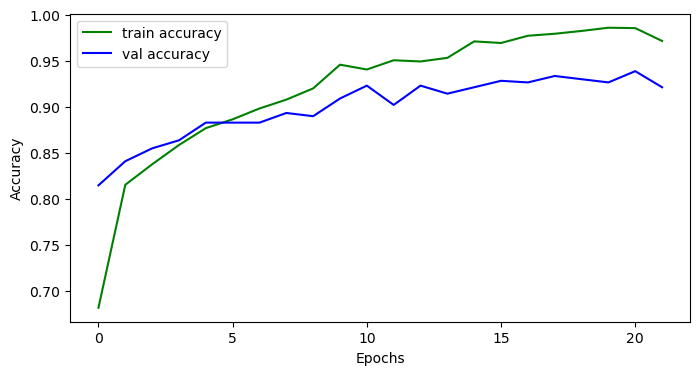

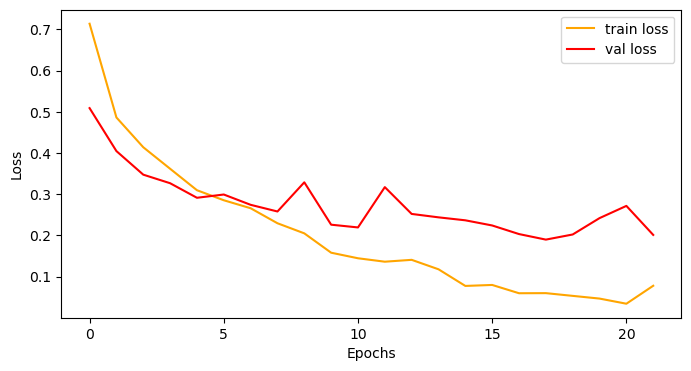

In [21]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']

# Accuracy plots
plt.figure(figsize=(8, 4))
plt.plot(train_acc, color='green', linestyle='-', label='train accuracy')
plt.plot(valid_acc, color='blue', linestyle='-', label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# loss plots
plt.figure(figsize=(8, 4))
plt.plot(train_loss, color='orange', linestyle='-', label='train loss')
plt.plot(valid_loss, color='red', linestyle='-', label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()